# Adversarial Learning

## Utilisez les GPUs de Google !!!

### Important notice: you may freely use Google GPU at https://colab.research.google.com/ (few hours free)

- Vous pouvez executer des notebooks et les sauvegarder dans votre google drive.

- Pour utiliser le GPU vous devz aller dans le menu Execution et Modifier le type d'execution

- L'environnement minimal est installé (numpy, tensorflow etc) mais vous devez installer tout ce que vous souhaitez utiliser et qui n'est pas dans l'environnment par défaut. Si vous souhaitez sauvergarder quelque chose cela peut se faire dans votre google drive.


#### Par exemple pour installer keras puis tqdm, utilisez le code suivant:



# https://keras.io/
!pip install -q keras
import keras

!pip install -q tqdm
import tqdm

In [ ]:
# https://keras.io/
!pip install -q keras
import keras

!pip install -q tqdm
import tqdm

#### Pour récupérer des fichiers (plots, modèles etc) vous poi!ez utiliser le code suivant:



- Pour sauvegarder un modèle vous devez le sauvegarder dans l'environnement Google puis le télécharger

from google.colab import files

from keras.models import model_from_json

model_json = gan.to_json()
with open("gan_model.json", "w") as json_file:
    json_file.write(model_json)
gan.save_weights("gan_model.h5")
print("Saved model to disk")
files.download("gan_model.json")
files.download("gan_model.h5")

- Pour sauvegarder un plot => idem

plt.figure(figsize=(10, 8))
plt.plot(gLosses, label='Generative loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.savefig('cgan_loss_epoch_%d.png' % epoch)
files.download('cgan_loss_epoch_%d.png' % epoch)


- Pour récupérer un modèle utilisez :


json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

loaded_model.load_weights("model.h5")
print("Loaded model from disk")

loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X, Y, verbose=0)
...

# 1. Building and learning a GAN

## Basics

### Standard imports

In [ ]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

### Loading data

In [ ]:
from keras.datasets import mnist
from keras.utils import np_utils

# Deterministic output.
# Tired of seeing the same results every time? Remove the line below.
np.random.seed(1000)

# The results are a little better when the dimensionality of the random vector is only 10.
# The dimensionality has been left at 100 for consistency with other GAN implementations.
randomDim = 100

# Load MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = (X_train.astype(np.float32) - 127.5)/127.5
X_train = X_train[:, np.newaxis, :, :]

X_test = (X_test.astype(np.float32) - 127.5)/127.5
X_test = X_test[:, np.newaxis, :, :]

# convert class vectors to binary class matrices
nb_classes=10
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)


In [82]:
print X_train.shape
print Y_train.shape

(60000, 1, 28, 28)
(60000, 10)


### Keras imports

In [ ]:
from keras.layers import Input
from keras.models import Model, Sequential
from keras.layers.core import Reshape, Dense, Dropout, Flatten
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import Conv2D, UpSampling2D

from keras.optimizers import Adam
from keras import backend as K
from keras import initializers

K.set_image_dim_ordering('th')

## Building a generator and a discriminator

#### To do:

- Build a generator model using the code below, that takes as input a random vector of size randomDIM and outputs a tensor of size 28, 28. You must set the kernel_size of the last Conv2D kayer so that the output has good shape.  

- Build a convolutional discriminator for mnist-like data (either true or generated) but with only one output neuron for the real/fake decision.

In [ ]:
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D

In [85]:
###### Code à compléter  #######


adam = Adam(lr=0.0002, beta_1=0.5)

# Generator
generator = Sequential()
generator.add(Dense(128*7*7, input_dim=randomDim, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
generator.add(LeakyReLU(0.2))
generator.add(Reshape((128, 7, 7)))
generator.add(UpSampling2D(size=(2, 2)))
generator.add(Conv2D(64, kernel_size=(5, 5), padding='same'))
generator.add(LeakyReLU(0.2))
generator.add(UpSampling2D(size=(2, 2)))
generator.add(Conv2D(1, kernel_size=(5, 5), padding='same'))

generator.summary()
                     
generator.compile(loss='binary_crossentropy', optimizer=adam)

# Discriminator

nb_classes = 10
nb_filters = 32
pool_size=(2,2)
kernel_size = (3,3)
input_shape = (1, 28, 28)

discriminator = Sequential()
discriminator.add(Conv2D(nb_filters, kernel_size,
                             border_mode='valid',
                             input_shape=input_shape))
discriminator.add(Activation('relu'))
discriminator.add(MaxPooling2D(pool_size=pool_size))
discriminator.add(Conv2D(nb_filters, kernel_size))
discriminator.add(Activation('relu'))
discriminator.add(MaxPooling2D(pool_size=pool_size))
discriminator.add(Dropout(0.5))
discriminator.add(Flatten())
discriminator.add(Dense(100))
discriminator.add(Activation('relu'))
discriminator.add(Dropout(0.5))
discriminator.add(Dense(1))
discriminator.add(Activation('sigmoid'))       

discriminator.summary()
                     
discriminator.compile(loss='binary_crossentropy', optimizer=adam)




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 6272)              633472    
_________________________________________________________________
leaky_re_lu_25 (LeakyReLU)   (None, 6272)              0         
_________________________________________________________________
reshape_13 (Reshape)         (None, 128, 7, 7)         0         
_________________________________________________________________
up_sampling2d_25 (UpSampling (None, 128, 14, 14)       0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 64, 14, 14)        204864    
_________________________________________________________________
leaky_re_lu_26 (LeakyReLU)   (None, 64, 14, 14)        0         
_________________________________________________________________
up_sampling2d_26 (UpSampling (None, 64, 28, 28)        0         
__________

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="valid", input_shape=(1, 28, 28...)`


## Putting all together and building the models to implement a GAN

### To do:

- You must now build the combined network that you will use to learn the generator to flue the discriminator. It is a model composed of the generator followed by the discriminator which takes as input a random noise and outputs the output of the discriminator => Use the keras API for building the model.

- Note that to implement correctly tht GAN the discriminator should have its weights set at Trainable = False



In [ ]:
# Useful functions for plotting the loss evolution

def plotLoss(e, dLosses, gLosses):
    plt.figure(figsize=(10, 8))
    plt.plot(dLosses, label='Discriminitive loss')
    plt.plot(gLosses, label='Generative loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    plt.savefig('dcgan_loss_epoch_%d.png' % e)

# Create a wall of generated MNIST images
def plotGeneratedImages(epoch, examples=100, dim=(10, 10), figsize=(10, 10)):
    noise = np.random.normal(0, 1, size=[examples, randomDim])
    generatedImages = generator.predict(noise)

    plt.figure(figsize=figsize)
    for i in range(generatedImages.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generatedImages[i, 0], interpolation='nearest', cmap='gray_r')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('dcgan_generated_image_epoch_%d.png' % epoch)

# Save the generator and discriminator networks (and weights) for later use
def saveModels(epoch):
    generator.save('dcgan_generator_epoch_%d.h5' % epoch)
    discriminator.save('dcgan_discriminator_epoch_%d.h5' % epoch)
    

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense
from random import sample

In [ ]:
discriminator.trainable = False

x = Input(shape=(randomDim,))
y = generator(x)
z = discriminator(y)
gan = Model(inputs = x, outputs = z)

gan.compile(loss='binary_crossentropy', optimizer=adam)


## Adversarial learning of the models

- The code below implements the main loop for learning the models. It  alternates in the most inner loop (i.e. for each batch) between optimizing the generator and the discriminator. Fill he code so that it works at learning the models.  

- Vous pouvez générer le bruit en entrée avec np.random.normal
- Vous utiliserez la méthode train_on_batch pour faire une étape de descente de gradient 


In [ ]:

def train(X_train, Y_train, X_test, Y_test, epochs=1, batchSize=128):
    batchCount = X_train.shape[0] / batchSize
    print 'Epochs:', epochs
    print 'Batch size:', batchSize
    print 'Batches per epoch:', batchCount
    
    dLosses = []
    gLosses = []

    for e in xrange(1, epochs+1):
        print '-'*15, 'Epoch %d' % e, '-'*15
        dloss = 0
        gloss = 0
        for _ in tqdm(xrange(batchCount)):
          
            z_fake = np.random.normal(0, 1, size = (batchSize, randomDim))
            x_fake = generator.predict(z_fake)
            y_fake = np.zeros(batchSize) + 0.1

            x_real = sample(X_train, batchSize)
            y_real = np.ones(batchSize) - 0.1

            X = np.concatenate((x_fake, x_real), axis=0)
            Y = np.concatenate((y_fake, y_real), axis=0)
            
            dloss += discriminator.train_on_batch(X, Y)
            gloss += gan.train_on_batch(z_fake, y_fake)
            
        # Store loss of most recent batch from this epoch
        print('dloss',dloss)
        print('gloss',gloss)
        dLosses.append(dloss)
        gLosses.append(gloss)


        if e == 1 or e % 5 == 0:
            plotGeneratedImages(e)
            saveModels(e)

    # Plot losses from every epoch
    plotLoss(e, dLosses, gLosses)
    

  0%|          | 2/468 [00:00<00:34, 13.59it/s]

Epochs: 10
Batch size: 128
Batches per epoch: 468
--------------- Epoch 1 ---------------


100%|██████████| 468/468 [00:26<00:00, 17.91it/s]


('dloss', 164.53073248267174)
('gloss', 159.689150929451)


  0%|          | 2/468 [00:00<00:33, 13.78it/s]

--------------- Epoch 2 ---------------


  0%|          | 2/468 [00:00<00:25, 18.13it/s]

('dloss', 157.65442889928818)
('gloss', 156.69686949253082)
--------------- Epoch 3 ---------------


  0%|          | 2/468 [00:00<00:25, 18.48it/s]

('dloss', 156.61886394023895)
('gloss', 156.17812159657478)
--------------- Epoch 4 ---------------


  0%|          | 2/468 [00:00<00:25, 18.59it/s]

('dloss', 155.97989490628242)
('gloss', 155.78090098500252)
--------------- Epoch 5 ---------------


100%|██████████| 468/468 [00:26<00:00, 17.96it/s]


('dloss', 155.53115406632423)
('gloss', 155.5406615138054)


  0%|          | 2/468 [00:00<00:33, 13.84it/s]

--------------- Epoch 6 ---------------


  0%|          | 2/468 [00:00<00:25, 18.55it/s]

('dloss', 155.24264696240425)
('gloss', 155.38013342022896)
--------------- Epoch 7 ---------------


  0%|          | 2/468 [00:00<00:27, 17.25it/s]

('dloss', 155.02282443642616)
('gloss', 155.24264878034592)
--------------- Epoch 8 ---------------


  0%|          | 2/468 [00:00<00:24, 18.66it/s]

('dloss', 154.84627223014832)
('gloss', 155.1313617825508)
--------------- Epoch 9 ---------------


  0%|          | 2/468 [00:00<00:26, 17.67it/s]

('dloss', 154.70665407180786)
('gloss', 154.91912585496902)
--------------- Epoch 10 ---------------


100%|██████████| 468/468 [00:26<00:00, 17.97it/s]


('dloss', 154.63248339295387)
('gloss', 154.79973375797272)


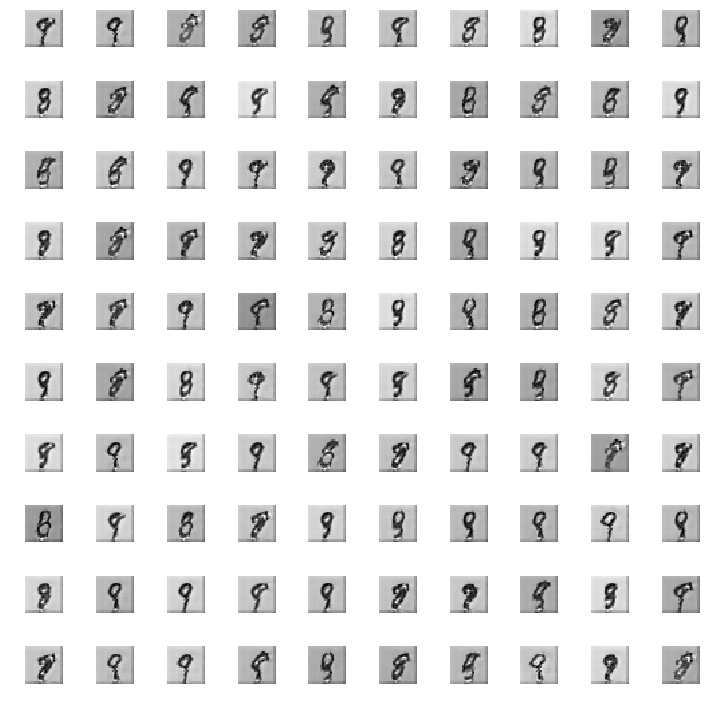

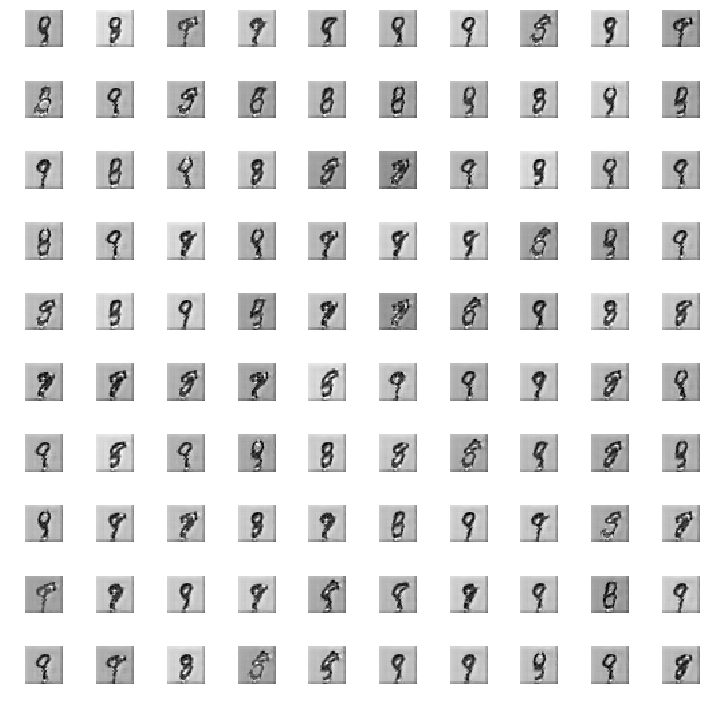

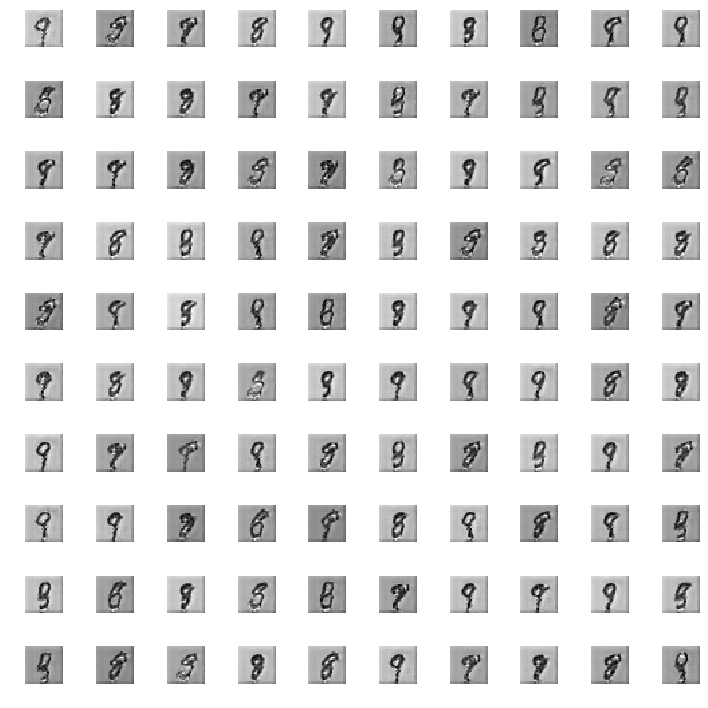

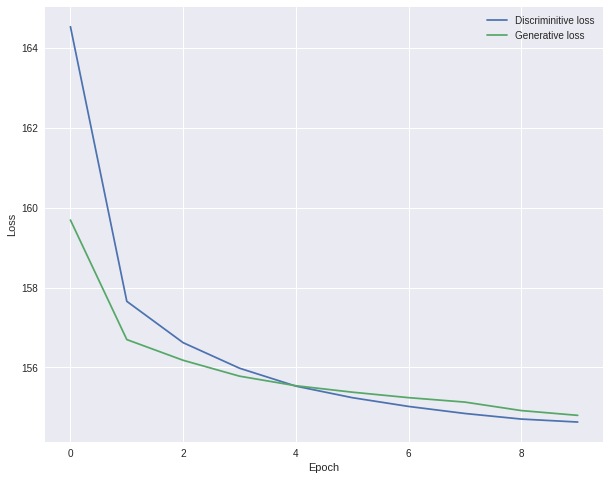

In [93]:
train(X_train, Y_train, X_test, Y_test, 10, 128)

# 2. CGAN: A conditional variant of GANs 

## To do 

Implémentez une version conditionnelle de cette stratégie adversariale que vous testerez sur Mnist, en vous inspirant pour le générateur de l'architecture proposée plus haut (ou de celles de l'article original des CGAN, https://arxiv.org/pdf/1411.1784.pdf), et pour le discriminateur de ceux que vous avez déjà utilisés pour les données Mnist.

Dans ces modèles la partie utilisée comme contexte est la classe de l'exemple.

Affichez des données générées avec votre modèle



In [ ]:
from keras.layers import concatenate
# Optimizer
adam = Adam(lr=0.0002, beta_1=0.5)

# Generator to define 

noise_input = Input(shape=(randomDim,), name='noise_input')
label_input = Input(shape=(nb_classes,), name='label_input')


....


cgan_generator.compile(loss='binary_crossentropy', optimizer=adam)




In [ ]:


# Discriminator to define

....

cgan_discriminator.compile(loss='binary_crossentropy', optimizer=adam)



In [ ]:

# Combined network: to define 



In [ ]:

def train(X_train, Y_train, X_test, Y_test, epochs=1, batchSize=128):
    batchCount = X_train.shape[0] / batchSize
    print 'Epochs:', epochs
    print 'Batch size:', batchSize
    print 'Batches per epoch:', batchCount
    
    dLosses = []
    gLosses = []

    for e in xrange(1, epochs+1):
        print '-'*15, 'Epoch %d' % e, '-'*15
        dloss = 0
        gloss = 0
        for _ in tqdm(xrange(batchCount)):
            
            z_fake = np.random.normal(0, 1, size = (batchSize, randomDim))
            x_fake = generator.predict(z_fake)
            y_fake = np.zeros(batchSize) + 0.1

            x_real = sample(X_train, batchSize)
            y_real = np.ones(batchSize) - 0.1

            X = np.concatenate((x_fake, x_real), axis=0)
            Y = np.concatenate((y_fake, y_real), axis=0)
            
            dloss += discriminator.train_on_batch(X, Y)
            gloss += gan.train_on_batch(z_fake, y_fake)

        # Store loss of most recent batch from this epoch
        dLosses.append(dloss)
        gLosses.append(gloss)

        if e == 1 or e % 5 == 0:
            plotGeneratedImages(e)
            saveModels(e)

    # Plot losses from every epoch
    plotLoss(e)

In [ ]:
train(X_train, Y_train, X_test, Y_test, 50, 128)